In [1]:
import sklearn
import pandas as pd
import numpy as np

In [2]:
from sklearn import datasets

In [5]:
iris=  datasets.load_iris()

In [18]:
iris=pd.DataFrame(iris.data)

In [21]:
iris.columns=["Sepal Length", "Sepal Width", "Petal Length","Petal Width"]


In [22]:
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [25]:
from sklearn.cluster import KMeans

In [73]:
WithinSS=list(range(0,10))
ClusterNo=list(range(1,11))

In [74]:

for i in range(0,10):
    KMObject=KMeans(n_clusters=i+1,init='random',random_state=0).fit(iris)
    WithinSS[i]=KMObject.inertia_



In [76]:
print(WithinSS)
print(ClusterNo)

[680.82439999999997, 152.36870647733906, 78.940841426146022, 57.317873214285711, 46.561630158730161, 38.930963049671746, 34.721892109500807, 29.881402210510913, 28.094749144130731, 26.571304387641344]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [81]:
import matplotlib.pyplot as plt


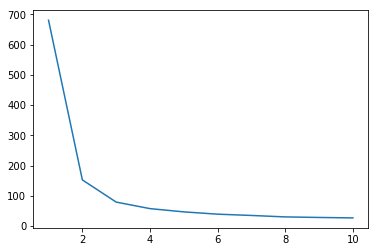

In [84]:
plt.plot(ClusterNo,WithinSS)
plt.show()

In [85]:
KMObject=KMeans(n_clusters=3,init='random',random_state=0).fit(iris)


## Alternative?

In [38]:
from scipy.cluster.vq import vq,kmeans

In [39]:
IKM=kmeans(iris,3)

In [44]:
codebook=IKM[0]

In [45]:
codebook

array([[ 6.85384615,  3.07692308,  5.71538462,  2.05384615],
       [ 5.006     ,  3.418     ,  1.464     ,  0.244     ],
       [ 5.88360656,  2.74098361,  4.38852459,  1.43442623]])

In [46]:
IVQ=vq(iris,codebook)

In [48]:
code=IVQ[0]

In [50]:
code

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [52]:
dist=IVQ[1]

In [53]:
dist

array([ 0.14694217,  0.43816892,  0.41230086,  0.51883716,  0.19796969,
        0.68380699,  0.41520116,  0.0599333 ,  0.80099438,  0.36659514,
        0.48784424,  0.25138019,  0.49192682,  0.90906105,  1.02019214,
        1.21309192,  0.66241377,  0.1509702 ,  0.82848778,  0.39898872,
        0.46172719,  0.33762701,  0.64435394,  0.37946278,  0.4845534 ,
        0.44180539,  0.20782685,  0.21815591,  0.2097427 ,  0.40198507,
        0.40495926,  0.42566654,  0.72442529,  0.9282198 ,  0.36659514,
        0.34524194,  0.5287646 ,  0.36659514,  0.75550778,  0.11131936,
        0.19181241,  1.23935144,  0.66602703,  0.38986151,  0.60761172,
        0.47370033,  0.41855943,  0.4673243 ,  0.41132955,  0.14139307,
        1.22271402,  0.70291175,  0.98704628,  0.7145924 ,  0.65760595,
        0.26017587,  0.78122624,  1.56759804,  0.7754341 ,  0.84192578,
        1.51921669,  0.32741362,  0.8036717 ,  0.41269169,  0.86345836,
        0.89258494,  0.40527627,  0.52975683,  0.63991778,  0.69

means=iris.mean(0)

In [101]:
TSS = np.sum(np.sum((iris-means)**2))


In [97]:
SSW = np.sum(dist**2)


In [103]:
SSB=TSS-SSW

In [105]:
RSquare=(SSB/TSS)

In [109]:
R2=[0,0,0,0,0,0,0,0,0,0]
for i in range(0,10):
    codebook=kmeans(iris,i+1)[0]
    IVQ=vq(iris,codebook)
    dist=IVQ[1]
    means=iris.mean(0)
    TSS = np.sum(np.sum((iris-means)**2))
    SSW = np.sum(dist**2)
    SSB=TSS-SSW
    R2[i]=(SSB/TSS)

In [110]:
R2

[-5.0095224725325395e-16,
 0.77619969778207254,
 0.8840448934762366,
 0.91581107666780792,
 0.93160992737814596,
 0.9428064861606168,
 0.94960132150667809,
 0.95539643005258401,
 0.95746420681527489,
 0.9609919394555555]

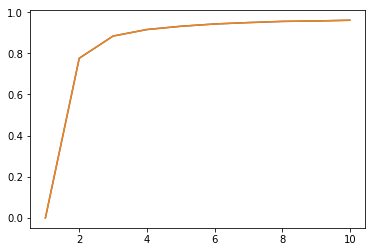

In [112]:
plt.plot(ClusterNo,R2)
plt.show()